(3, 1) (100, 3)


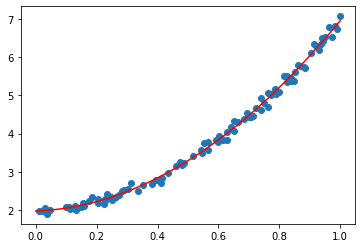

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100, 1)
y = 2.0+5*x*x+0.1*np.random.randn(100, 1)

# Y = a +b*x + c*x**2
X = np.zeros((len(x), 3))
X[:, 0] = 1
X[:, 1] = x[:, 0]
X[:, 2] = x[:, 0]**2

XT = np.transpose(X)

XTXinv = np.linalg.inv(np.matmul(XT, X))
XTy = np.matmul(XT, y)
beta = np.matmul(XTXinv, XTy)

print(np.shape(beta), np.shape(X))
# y_ = np.matmul(X, beta)

x_ = np.linspace(0, 1, 1000)
y_ = beta[0] + beta[1]*x_ + beta[2]*x_**2 

plt.scatter(x, y)
plt.plot(x_, y_, c="r")
plt.show()

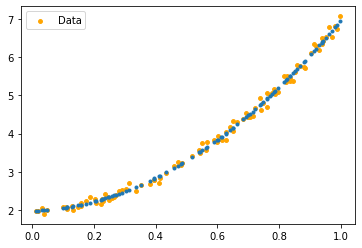

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly3 = PolynomialFeatures(degree=2)
X = poly3.fit_transform(x)
clf3 = LinearRegression()
clf3.fit(X, y)
y_ = clf3.predict(X)
#Xplot=poly3.fit_transform(x)

plt.scatter(x, y, label='Data', color='orange', s=15)
plt.plot(x, y_, ".")
plt.legend()
plt.show()

In [3]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(y, y_))
print(R2(y, y_))

0.008977701592422567
0.9962045938845269


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


np.random.seed()
n = 1000
# Make data set.
def exercise3(maxdegree):
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

    poly3 = PolynomialFeatures(degree=maxdegree)
    X = poly3.fit_transform(x)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf3 = LinearRegression()
    clf3.fit(X_train_scaled, y_train)
    y_ = clf3.predict(X_test_scaled)


    #x_ = np.linspace(-3, 3, int(0.2*n))
    plt.scatter(x, y)
    plt.scatter(X_test[:, 1], y_)

    print(f"MSE={MSE(y_test, y_)}")
    print(f"R2={R2(y_test, y_)}")

MSE=0.022603364358023126
R2=0.9156616777482129


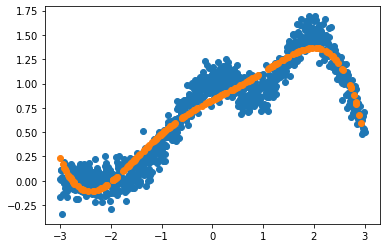

In [12]:
exercise3(5)

MSE=0.01076278245725711
R2=0.9572897996384133


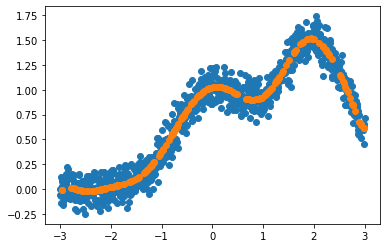

In [13]:
exercise3(14)

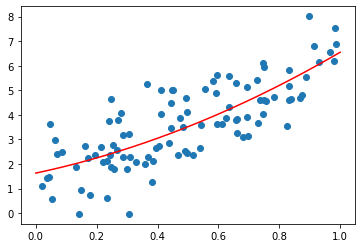

MSE=484.2092101937498
R2=-1740.069441234271


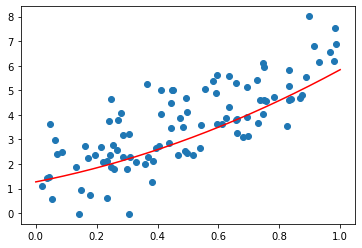

MSE=472.12133243558105
R2=-1696.6050995178014


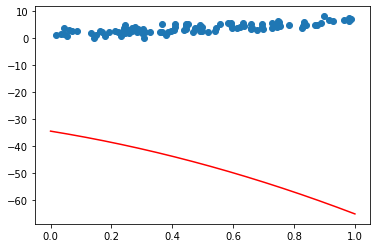

MSE=271965.1904672878
R2=-977903.3277854711


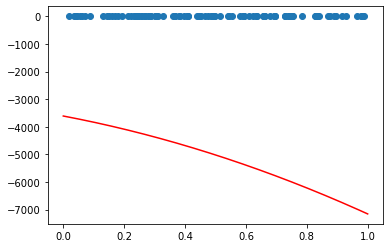

MSE=2754439841.2106414
R2=-9904130144.172379


In [14]:
n = 100
x = np.random.rand(n, 1)
y = 2.0+5*x*x+1*np.random.randn(n, 1)

degree = 3
X = np.zeros((len(x), degree))
X[:, 0] = 1
X[:, 1] = x[:, 0]
X[:, 2] = x[:, 0]**2

XT = np.transpose(X)

XTXinv = np.linalg.inv(np.matmul(XT, X))
XTy = XT @ y
def find_beta(XTXinv, XTy, lmda):
    beta = (XTXinv - lmda*np.eye(degree, degree)) @ XTy

    # y_ = np.matmul(X, beta)

    x_ = np.linspace(0, 1, 1000)
    y_ = beta[0] + beta[1]*x_ + beta[2]*x_**2 

    plt.scatter(x, y)
    plt.plot(x_, y_, c="r")
    plt.show()
    print(f"MSE={MSE(y, y_)}")
    print(f"R2={R2(y, y_)}")
    
    
lmda = np.logspace(-5, 1, 4)

for lmda_ in lmda:
    find_beta(XTXinv, XTy, lmda_)
    